Files already downloaded and verified


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Files already downloaded and verified


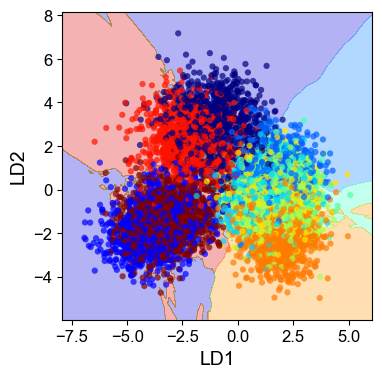

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10 
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

# Set font to Arial
rcParams['font.family'] = 'Arial'

# Define LeNet-5 model without dropout for color images
class SimpleLeNet5Color(nn.Module):
    def __init__(self):
        super(SimpleLeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6 * 14 * 14, 10)  # Adjust input size based on your image dimensions

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = x.view(-1, 6 * 14 * 14)  # Adjust the view size based on your image dimensions
        x = self.fc1(x)
        outputs['fc1'] = x
        return x, outputs

# Load the pre-trained model
n = 1
model = SimpleLeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model2_accuracies = dict()
layers = ['relu1']

for layer in layers:
    
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = SimpleLeNet5Color()
        model.load_state_dict(torch.load('model2_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from matplotlib.colors import ListedColormap
        from sklearn.neighbors import KNeighborsClassifier


        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 2 components
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select three classes (e.g., classes 0, 1, and 2) after PCA transformation
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4, 
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_pca_selected = X_lda[:]
        y_selected = y[:]

        # Fit a KNN classifier on the PCA-transformed features
        knn = KNeighborsClassifier(n_neighbors=10)
        knn.fit(X_pca_selected, y_selected)

        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X_pca_selected[:, 0].min() - 1, X_pca_selected[:, 0].max() + 1
        y_min, y_max = X_pca_selected[:, 1].min() - 1, X_pca_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class probabilities for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        plt.figure(figsize=(4, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.7)
        plt.xlabel('LD1', fontsize=14)
        plt.ylabel('LD2', fontsize=14)
        ax = plt.gca()  # Get current axis

        # Make tick labels larger
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

Files already downloaded and verified
Files already downloaded and verified


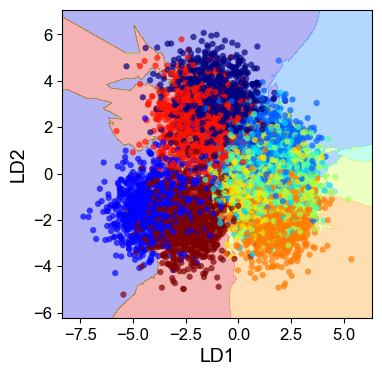

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x

        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model3_accuracies = dict() #change
layers = ['relu1']

for layer in layers:
    
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model3_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from matplotlib.colors import ListedColormap


        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 2 components
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select three classes (e.g., classes 0, 1, and 2) after PCA transformation
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_pca_selected = X_lda[:]
        y_selected = y[:]

        # Fit a KNN classifier on the PCA-transformed features
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_pca_selected, y_selected)

        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X_pca_selected[:, 0].min() - 1, X_pca_selected[:, 0].max() + 1
        y_min, y_max = X_pca_selected[:, 1].min() - 1, X_pca_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class probabilities for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        plt.figure(figsize=(4, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.7)
        plt.xlabel('LD1', fontsize=14)
        plt.ylabel('LD2', fontsize=14)
        ax = plt.gca()  # Get current axis

        # Make tick labels larger
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.show()
    

Files already downloaded and verified
Files already downloaded and verified


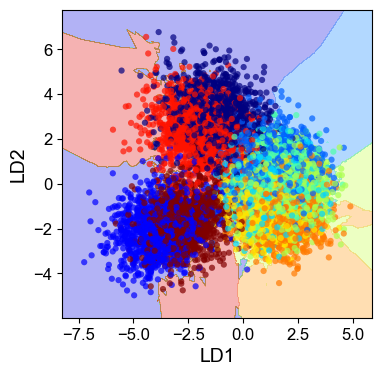

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)
        #self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x

        #x = self.fc3(x)
        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model4_accuracies = dict()
layers = ['relu1']

for layer in layers:

    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model4_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)


        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from matplotlib.colors import ListedColormap


        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)
        
        # Fit LDA with 2 components
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select three classes (e.g., classes 0, 1, and 2) after PCA transformation
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_pca_selected = X_lda[:]
        y_selected = y[:]

        # Fit a KNN classifier on the PCA-transformed features
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_pca_selected, y_selected)

        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X_pca_selected[:, 0].min() - 1, X_pca_selected[:, 0].max() + 1
        y_min, y_max = X_pca_selected[:, 1].min() - 1, X_pca_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class probabilities for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        plt.figure(figsize=(4, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.7)
        plt.xlabel('LD1', fontsize=14)
        plt.ylabel('LD2', fontsize=14)
        ax = plt.gca()  # Get current axis

        # Make tick labels larger
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

Files already downloaded and verified
Files already downloaded and verified


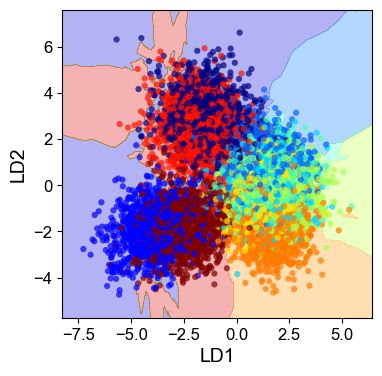

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)        
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model5_accuracies = dict()
layers = ['relu1']

for layer in layers:
    
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)

        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from matplotlib.colors import ListedColormap


        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 2 components
        lda = LinearDiscriminantAnalysis(n_components=2)
        X_lda = lda.fit_transform(X_standardized, y)

        # Select three classes (e.g., classes 0, 1, and 2) after PCA transformation
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_pca_selected = X_lda[:]
        y_selected = y[:]

        # Fit a KNN classifier on the PCA-transformed features
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_pca_selected, y_selected)

        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X_pca_selected[:, 0].min() - 1, X_pca_selected[:, 0].max() + 1
        y_min, y_max = X_pca_selected[:, 1].min() - 1, X_pca_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class probabilities for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        plt.figure(figsize=(4, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.7)
        plt.xlabel('LD1', fontsize=14)
        plt.ylabel('LD2', fontsize=14)
        ax = plt.gca()  # Get current axis

        # Make tick labels larger
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.show()

Files already downloaded and verified
Files already downloaded and verified


/Users/mitchellslapik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/mitchellslapik/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


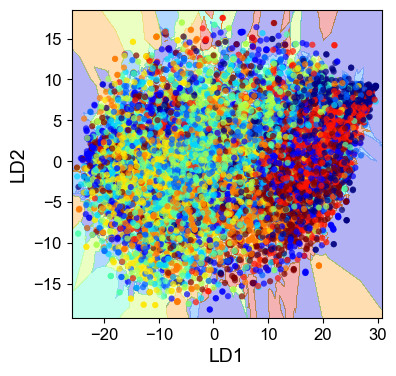

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Define LeNet-5 model without dropout for color images
class LeNet5Color(nn.Module):
    def __init__(self):
        super(LeNet5Color, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        outputs = {}
        outputs['inputs'] = x
        x = self.conv1(x)
        outputs['conv1'] = x
        x = torch.relu(x)        
        outputs['relu1'] = x
        x = self.pool(x)
        outputs['pool1'] = x
        x = self.conv2(x)
        outputs['conv2'] = x
        x = torch.relu(x)
        outputs['relu2'] = x
        x = self.pool(x)
        outputs['pool2'] = x
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc1(x)
        outputs['fc1'] = x
        x = torch.relu(x)
        outputs['relu3'] = x
        x = self.fc2(x)
        outputs['fc2'] = x
        x = torch.relu(x)
        outputs['relu4'] = x
        x = self.fc3(x)
        outputs['fc3'] = x
        return x, outputs



# Load the pre-trained model
n = 1
model = LeNet5Color()       #CHANGE
model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))    #CHANGE
model.eval()

# Define the transformation for the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load the CIFAR-10 dataset
cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

# Get the activations of the conv1 layer for the test set
labels_list = []  # List to collect labels
output = None
with torch.no_grad():
    for inputs, labels in dataloader:
        _, output = model(inputs)
     
layers = output.keys();
model5_accuracies = dict()
layers = ['relu1']

for layer in layers:
    
    all_accuracies = []

    for n in range(1):
        # Load the pre-trained model
        model = LeNet5Color()
        model.load_state_dict(torch.load('model5_' + str(n) + '_9.pth'))  #change
        model.eval()

        # Define the transformation for the CIFAR-10 dataset
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        ])

        # Load the CIFAR-10 dataset
        cifar_test = CIFAR10(root='./data', train=False, download=True, transform=transform)
        dataloader = DataLoader(cifar_test, batch_size=100, shuffle=False)

        # Get the activations of the conv1 layer for the test set
        labels_list = []  # List to collect labels
        activations = None
        with torch.no_grad():
            for inputs, labels in dataloader:
                _, output = model(inputs)
                activations = output[layer] if activations is None else torch.cat((activations, output[layer]), 0)
                labels_list.extend(labels)

        # Import necessary libraries
        from sklearn.model_selection import train_test_split
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score
        from matplotlib.colors import ListedColormap


        # Reshape and standardize the activations
        X = activations.reshape(activations.shape[0], -1)
        y = labels_list

        X = X.numpy()
        y = np.array([label.numpy() for label in labels_list])

        # Standardize the features
        scaler = StandardScaler()
        X_standardized = scaler.fit_transform(X)

        # Fit LDA with 2 components
        #lda = LinearDiscriminantAnalysis(n_components=2)
        #X_lda = lda.fit_transform(X_standardized, y)

        tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)

        # Fit and transform the data
        X_lda = tsne.fit_transform(X_standardized)
        # Select three classes (e.g., classes 0, 1, and 2) after PCA transformation
        class_1, class_2, class_3, class_4, class_5 = 0, 1, 2, 3, 4
        indices = np.where((y == class_1) | (y == class_2) | (y == class_3) | (y == class_4) | (y == class_5))

        X_pca_selected = X_lda[:]
        y_selected = y[:]

        # Fit a KNN classifier on the PCA-transformed features
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_pca_selected, y_selected)

        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X_pca_selected[:, 0].min() - 1, X_pca_selected[:, 0].max() + 1
        y_min, y_max = X_pca_selected[:, 1].min() - 1, X_pca_selected[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))

        # Predict class probabilities for each point in the mesh grid
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Define colormap for the classes using 'jet'
        cmap_light = plt.cm.jet
        cmap_bold = plt.cm.jet

        plt.figure(figsize=(4, 4))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
        plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=y_selected, cmap=cmap_bold, edgecolor='none', s=20, alpha=0.7)
        plt.xlabel('LD1', fontsize=14)
        plt.ylabel('LD2', fontsize=14)
        ax = plt.gca()  # Get current axis

        # Make tick labels larger
        ax.tick_params(axis='both', which='major', labelsize=12)
        plt.show()